In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [3]:
class linear_svm():
    
    def __init__(self, lr=0.01, itr=1000):
        self.lr = lr
        self.itr = itr
        self.w = None
        self.b = None
        self.y=None
        
    def fit(self, X,y):
        samples, feat = X.shape
        self.y=y
        self.w = np.zeros(feat)
        self.b = 0
        
        labels = np.ones(samples)
        
        j = 0
        for s in y:
            if s <= 0:
                labels[j] = -1
            j += 1
            
        for i in range(self.itr):
            c = 0
            for x_i in X: 
                # check if y * (wx - b) >=1 and udpate weights accordingly
                if (labels[c] * (np.dot(x_i, self.w) - self.b)) >= 1:
                    self.w = self.w - self.lr * self.w
                else:
                    self.w = self.w - self.lr * (self.w - np.dot(x_i, labels[c]))
                    self.b = self.b - self.lr * labels[c]
                c += 1
                
        
    def predict(self, X):
        pred = np.dot(X, self.w) - self.b   
        return pred
    
    def get_acc(self, X, y_actual):
       
        pred = np.sign(self.predict(X)) 
        count = 0
        for i in range(len(pred)):
            if pred[i] == y_test[i]:
                count += 1
        
        return count/len(pred)

    def plot_db(self, X, y):
        plt.scatter(X[:,0], X[:,1], c=y)
        ax = plt.gca()
        x_b = ax.get_xlim()
        y_b = ax.get_ylim()
        xx = np.linspace(x_b[0], x_b[1], 50)
        yy = np.linspace(y_b[0], y_b[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.predict(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        plt.title('Linear SVM decision boundary')
        plt.show()
        return

In [4]:
class log_reg():
    def __init__(self, lr=0.01, itr=1000):
        self.lr = lr
        self.itr = itr
        self.w = None
        self.b = None
        
        
    def sig(self, x):
        return 1.0/(1+np.exp(-x))

    def calc_gradient(self, X, y, y_hat, m):
        grad = (1/m)*np.dot(X.T,(y_hat - y))   
        return grad
    
    def fit(self, X, y):
        m,n = X.shape
        self.w = np.zeros(n)
    
        for i in range(self.itr):
            y_hat = self.sig(np.dot(X, self.w))
            grad = self.calc_gradient(X, y, y_hat, m)
            self.w = self.w - self.lr * grad
            
        return 
        
      
    def predict(self, X):
        return self.sig(np.dot(X, self.w))
        
        labels = []
              
        for pred in predictions:
            if pred >= 0.5:
                labels.append(1)
            else:
                labels.append(-1)
            
        labels = np.asarray(labels)
        return labels
        
    
    def get_acc(self, X, y):
        predictions = self.predict(X)
        
        labels = []
       
        for pred in predictions:
            if pred >= 0.5:
                labels.append(1)
            else:
                labels.append(-1)
            
        labels = np.asarray(labels)
        
        count = 0
        for i in range(len(labels)):
            if labels[i] == y[i]:
                count += 1
        
        return count/len(labels)
        
    def plot_db(self, X, y):
        
        plt.scatter(X[:,0], X[:,1], c=y)
        x_values = [np.min(X[:, 0]), np.max(X[:, 1])]
        y_values = - (np.dot(self.w[0], x_values)) / self.w[1]

        plt.plot(x_values, y_values, label='Decision Boundary')
        plt.title('Logistic Regression SVM decision boundary')
        plt.show()
        return

In [62]:
class kernel_svm():
    def __init__(self, lr=0.01, itr=1000, kernel='polynomial', p=2, g=0.1, C=1):
        self.lr = lr
        self.itr = itr
        self.kernel = kernel
        self.p = p
        self.g = g
        self.C = C
        self.y_t = None
        self.X_t = None
        self.w = None
        self.b = None
    
    def calc_kernel(self, X, Y):
        if self.kernel == 'polynomial':
            new_X = (np.dot(X, Y.T) + self.C)**self.p
            return new_X
        elif self.kernel == 'rbf':
            new_X = np.exp(-self.g * np.linalg.norm(X[:, np.newaxis] - Y[np.newaxis, :], axis=2) ** 2)
            return new_X
        return X
    
    def fit(self, X,y):
        self.X_t = X
        samples, feat = X.shape
        
        self.w = np.random.random(samples)
        self.b = 0
        
        labels = np.ones(samples)
        
        j = 0
        for s in y:
            if s <= 0:
                labels[j] = -1
            j += 1
            
        self.y_t = labels
        
        new_X = self.calc_kernel(X, X)
        
        for i in range(self.itr):
            grad = np.ones(samples) - np.dot(np.outer(labels,labels)*new_X, self.w)
            
            self.w = self.w + self.lr * grad
            
            #constraints
            for j in range(len(self.w)):
                if(self.w[j] > self.C):
                    self.w[j] = self.C
                elif(self.w[j] < 0):
                    self.w[j] = 0
            
        
        b_s = []
        for a in range(len(self.w)):
            if (self.w[a] < self.C and self.w[a] > 0):
                b_s.append(labels[a] - np.dot(self.w *labels, self.calc_kernel(X, X[a])))
        return

    def get_acc(self, X, y_actual):
        X = self.calc_kernel(self.X_t, X)
        
        pred = np.dot(self.w * self.y_t, X) - self.b   
        pred = np.sign(pred)
        
        count = 0
        for i in range(len(pred)):
            if pred[i] == y_test[i]:
                count += 1
        
        return count/len(pred)
    
    def predict(self, X):
        X = self.calc_kernel(self.X_t, X)
        pred = np.dot(self.w * self.y_t, X) - self.b   
 
        return pred
    
    def plot_db(self, X, y):
         
        plt.scatter(X[:,0], X[:,1], c=y)
        ax = plt.gca()
        x_b = ax.get_xlim()
        y_b = ax.get_ylim()
        xx = np.linspace(x_b[0], x_b[1], 50)
        yy = np.linspace(y_b[0], y_b[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.predict(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        plt.show()

In [88]:
class kernel_log_reg():
    def __init__(self, lr=0.01, itr=1000):
        self.lr = lr
        self.itr = itr
        self.w = None
        self.X = None
        self.y = None
        self.a = None
        
     
    
    def kernel(self, X, y):
        k = np.zeros([X.shape[0], y.shape[0]])
        
        for i in range(X.shape[0]):
            for j in range(y.shape[0]):
                if ((np.rint(X[i]) == np.rint(y[j])).all()):
                    k[i][j] = 1
                else:
                    k[i][j] = 0
                    
        return k
     
    
    def sig(self, x):
        return 1.0/(1+np.exp(-x))

    def calc_gradient(self, X, y):
        grad = np.dot(X, y - self.sig(np.dot(X, self.a)))   
        return grad
    
    def fit(self, X, y):
        m,n = X.shape
        self.X = X
        self.y = y
        
        self.a = np.zeros(m)
        K = self.kernel(X,X)
        for i in range(self.itr):
            grad = self.calc_gradient(K, y)
            self.a = self.a + grad * self.lr
        return 
        
    def predict(self, X):
        predictions = self.sig(np.dot((self.kernel(self.X, X)).T, self.a))
        
        labels = []
              
        for pred in predictions:
            if pred >= 0.5:
                labels.append(1)
            else:
                labels.append(-1)
            
        labels = np.asarray(labels)
        return labels
    
    def get_acc(self, X, y):
        
        pred = self.predict(X)
        count = 0
        for i in range(len(pred)):
            if pred[i] == y[i]:
                count += 1
        
        return count/len(pred)

    def plot_db(self, X, y):
        plt.scatter(X[:,0], X[:,1], c=y)
        ax = plt.gca()
        x_b = ax.get_xlim()
        y_b = ax.get_ylim()
        xx = np.linspace(x_b[0], x_b[1], 50)
        yy = np.linspace(y_b[0], y_b[1], 50)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.predict(xy).reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[-1, 0, 1],linestyles=['--', '-', '--'])
        
        plt.show()
        
        
    

In [64]:
X, y = make_circles(n_samples=1500, noise=0.06, random_state=42, factor=0.5)
y = np.where(y <= 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=250, random_state=42)

Accuracy Linear SVM:  0.492


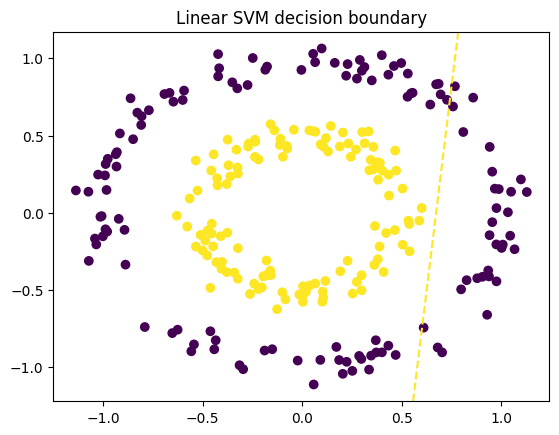

In [65]:
lsvm = linear_svm()
lsvm.fit(X_train, y_train)
print ("Accuracy Linear SVM: ",lsvm.get_acc(X_test, y_test))
lsvm.plot_db(X_test, y_test)

Accuracy Log Reg:  0.476


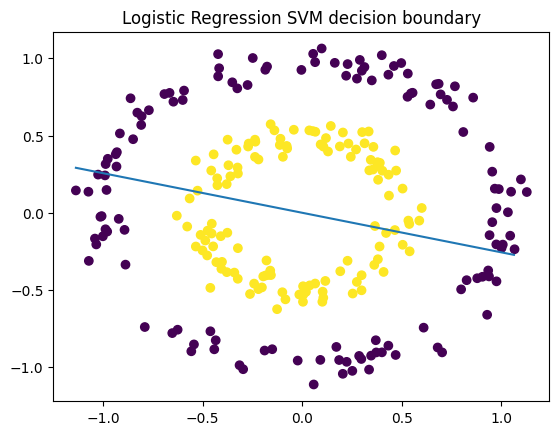

In [66]:
lr = log_reg()
lr.fit(X_train, y_train)
print("Accuracy Log Reg: ", lr.get_acc(X_test, y_test))
lr.plot_db(X_test, y_test)

### 2. Kernel SVM and Kernel Log Reg

Accuracy polynomial SVM 1.0


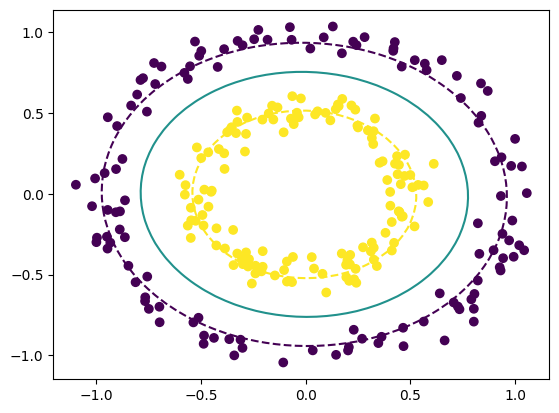

In [90]:
X, y = noisy_circles = make_circles(n_samples=350, noise=0.06, random_state=42, factor=0.5)
y = np.where(y <= 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=250, random_state=42)

ksvm_poly = kernel_svm(kernel='polynomial', p=2)
ksvm_poly.fit(X_train, y_train)
print("Accuracy polynomial SVM", ksvm_poly.get_acc(X_test, y_test))
ksvm_poly.plot_db(X_test,y_test)

Accuracy RBF SVM: 1.0


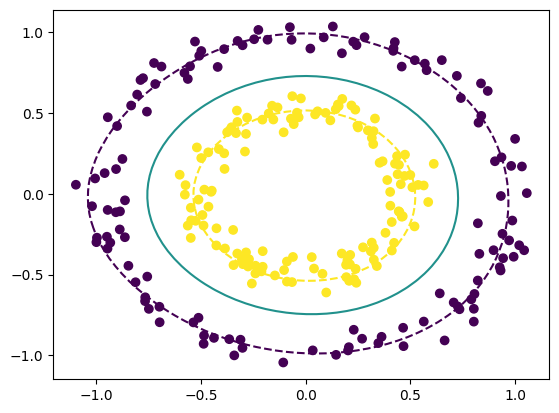

In [91]:
ksvm_rbf = kernel_svm(kernel='rbf', g=1)
ksvm_rbf.fit(X_train, y_train)
print("Accuracy RBF SVM:", ksvm_rbf.get_acc(X_test, y_test))
ksvm_rbf.plot_db(X_test, y_test)

Accuracy Kernel Log Reg: 0.844


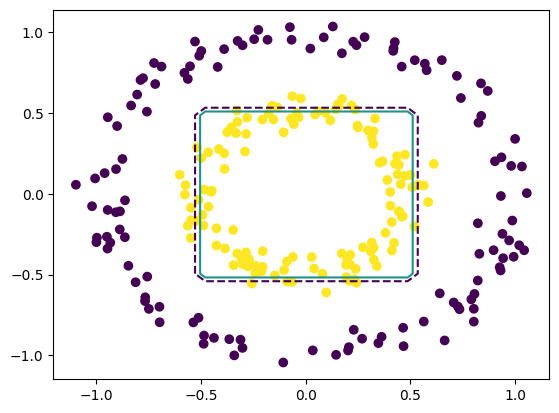

In [94]:
k_lg = kernel_log_reg()
k_lg.fit(X_train, y_train)
print("Accuracy Kernel Log Reg:", k_lg.get_acc(X_test, y_test))
k_lg.plot_db(X_test, y_test)

### 3: NN and KNN

In [69]:
def besthyperparms_knn(x, y):
  # Finding the best set of hyperparameters for knn using sklearn gridsearch CV
  #Consider three hyperparameters# 1. 
  #n_neighbors: Decide the best k 
  #weights: adding the weights to data points. 'uniform' ->no weight, 
  #'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
  #metric: The distance metric for similarity.
  grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
                'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan']}
  gs = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
  g_res = gs.fit(x, y)
  print ("Best Score: ",g_res.best_score_)
  print ("Best Hyperparameters: ", g_res.best_params_)

Accuracy: 1.0


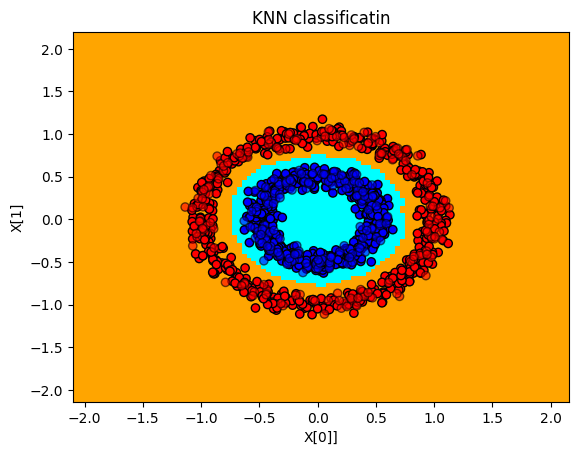

In [70]:

X, y = make_circles(n_samples=1500, noise=0.06, random_state=42, factor=0.5)
y = np.where(y <= 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=500, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=250, random_state=42)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan"])
cmap_bold = ["darkorange", "c"]
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy KNN:", accuracy)
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    knn,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="X[0]]",
    ylabel="X[1]",
    shading="auto",
)
# Plot the training points
ax.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
)
# Plot the testing points
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    edgecolors="k",
    alpha=0.6,
)
plt.title("KNN classificatin")

plt.show()

Accuracy: 1.0


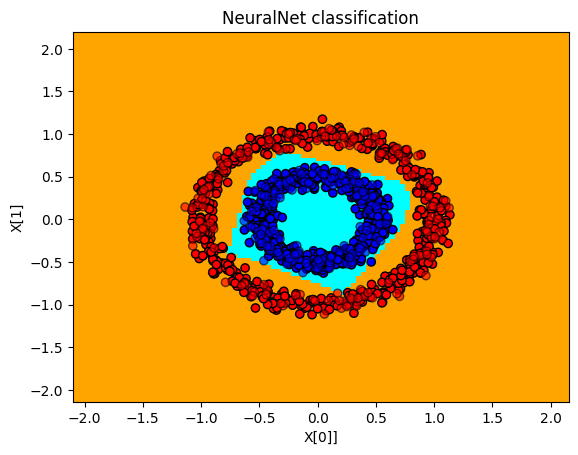

In [71]:
from sklearn.neural_network import MLPClassifier

# Create color maps
cmap_light = ListedColormap(["orange", "cyan"])
cmap_bold = ["darkorange", "c"]
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

nn = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,5), 
                     random_state=1,max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy NN:", accuracy)
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    nn,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="X[0]]",
    ylabel="X[1]",
    shading="auto",
)
# Plot the training points
ax.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
)
# Plot the testing points
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    edgecolors="k",
    alpha=0.6,
)
plt.title("NeuralNet classification" )

plt.show()